In [4]:

import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
import numpy as np
import math
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### clean keywords

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
pathfire='/content/drive/My Drive/disaster_tweets.csv'


df = pd.read_csv(pathfire)
df

# cleaning process

df.drop('id',inplace=True, axis = 1)
print("Unterschiedliche Keywords vor cleaning: ",df.keyword.nunique())
df_unique=pd.DataFrame(data=df.keyword.unique(),  columns=["col1"])
df_unique.dropna(inplace=True)

stemmer = PorterStemmer()
df_unique['keyword_stem']=df_unique['col1'].apply(lambda x: stemmer.stem(x))


print("Unterschiedliche Keywords nach stemming: ",df_unique.keyword_stem.nunique())
df_unique.keyword_stem.unique()


# manuelles vereinheitlichen
einheits_dict={'burning%20build':'fire',
               'buildings%20burn':'fire',
               'buildings%20on%20fir':'fire',
               'bloodi': 'blood',
               'bleed': 'blood',
               'bush%20fir':'fire',
               'dead':'death',
               'explod':'explos',
               'blown%20up':'explos',
               'bridge%20collaps':'damag',
               'demolish':'damag',
               'demolit':'damag',
               'injuri':'injur',
               'apocalyps':'catastroph',
               'armageddon':'catastroph',
               'arsonist':'arson',
               'mass%20murder':'mass%20murd',
               'panick':'panic',
               'disast':'catastroph',
               'armi':'militari',
               'earthquak':'catastroph',
               'hellfir':'fire',
               'tornado':'hurrican',
               'cyclon':'hurrican',
               'terrorist':'terror',
               'nuclear%20disast':'meltdown',
               'tsunami':'flood',
               'surviv': 'survivor',
               'traumatis':'trauma',
               'wild%20fir': 'wildfir',
               'twister':'hurrican',
               'typhoon':'hurrican',
               'suicide%20bomb':'bomb',
               'whirlwind':'hurrican',
               'blizzard':'hurican',
               'collid':'collis',
               'destruct':'destroy',
               'devast':'destroy',
               'mass%20murd':'massacr',
               'crash':'crush',
               'sunk':'sink',
               'lava':'volcano'
               }


df_unique['keywords_final']=df_unique['keyword_stem'].replace(einheits_dict)

print("Unterschiedliche Keywords nach stemming und manuellem einsortieren: ",df_unique.keywords_final.nunique())
df_unique.keywords_final.unique()


Unterschiedliche Keywords vor cleaning:  221
Unterschiedliche Keywords nach stemming:  166
Unterschiedliche Keywords nach stemming und manuellem einsortieren:  126


array(['ablaz', 'accid', 'aftershock', 'airplane%20accid', 'ambul',
       'annihil', 'catastroph', 'militari', 'arson', 'attack', 'avalanch',
       'battl', 'bioterror', 'blaze', 'blood', 'blew%20up', 'blight',
       'hurican', 'explos', 'body%20bag', 'bomb', 'damag', 'fire', 'burn',
       'casualti', 'chemical%20emerg', 'cliff%20fal', 'collaps', 'collis',
       'crush', 'curfew', 'hurrican', 'danger', 'death', 'debri', 'delug',
       'derail', 'desol', 'destroy', 'deton', 'displac', 'drought',
       'drown', 'dust%20storm', 'electrocut', 'emerg', 'emergency%20plan',
       'emergency%20servic', 'engulf', 'epicentr', 'evacu', 'eyewit',
       'famin', 'fatal', 'fear', 'fire%20truck', 'first%20respond',
       'flame', 'flatten', 'flood', 'forest%20fir', 'hail', 'hailstorm',
       'harm', 'hazard', 'heat%20wav', 'hijack', 'hostag', 'injur',
       'inund', 'landslid', 'volcano', 'lightn', 'loud%20bang', 'massacr',
       'mass%20murd', 'mayhem', 'meltdown', 'mudslid', 'natural%2

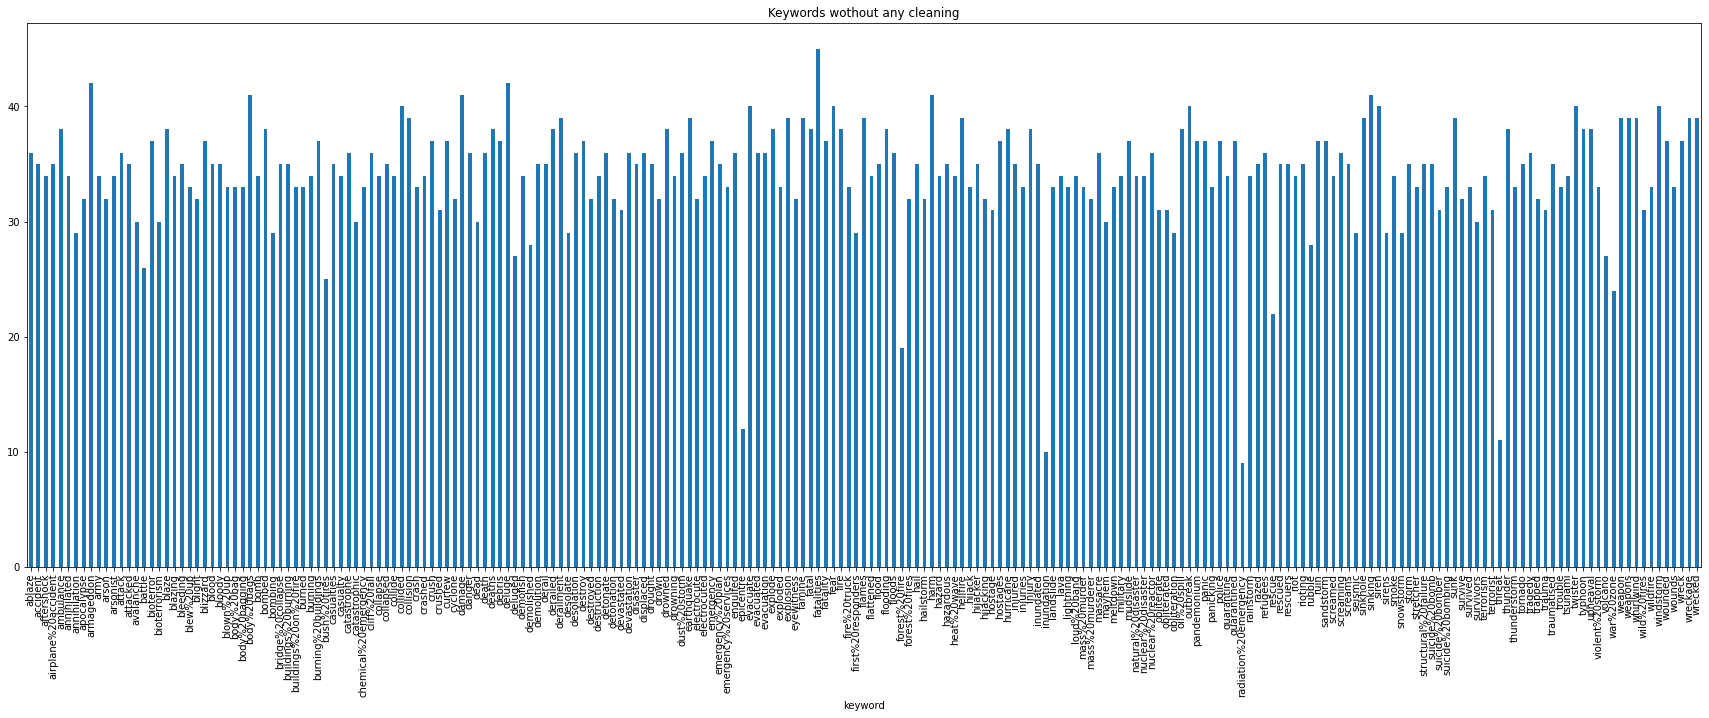

In [7]:


plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title('Keywords wothout any cleaning')
plt.show()

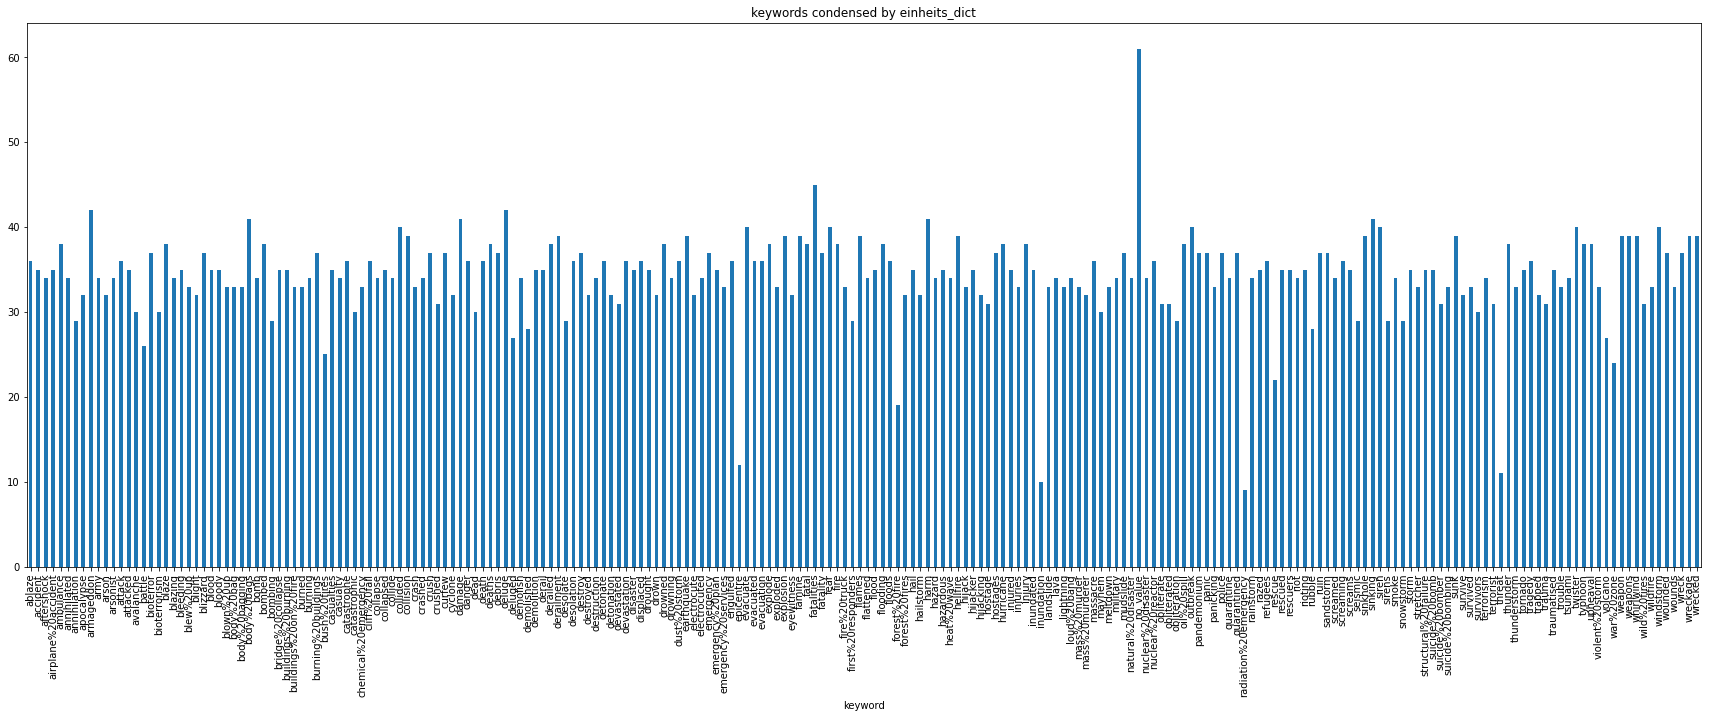

In [8]:
import numpy as np
import math
df.fillna('no_value',inplace=True)
df['keyword_stem']=df['keyword'].apply(lambda x: stemmer.stem(x))
df['keywords_final']=df['keyword_stem'].replace(einheits_dict)
plt.figure(figsize=(30,10))
df.groupby('keyword')['keyword'].count().plot(kind='bar')
plt.title("keywords condensed by einheits_dict")
plt.show()

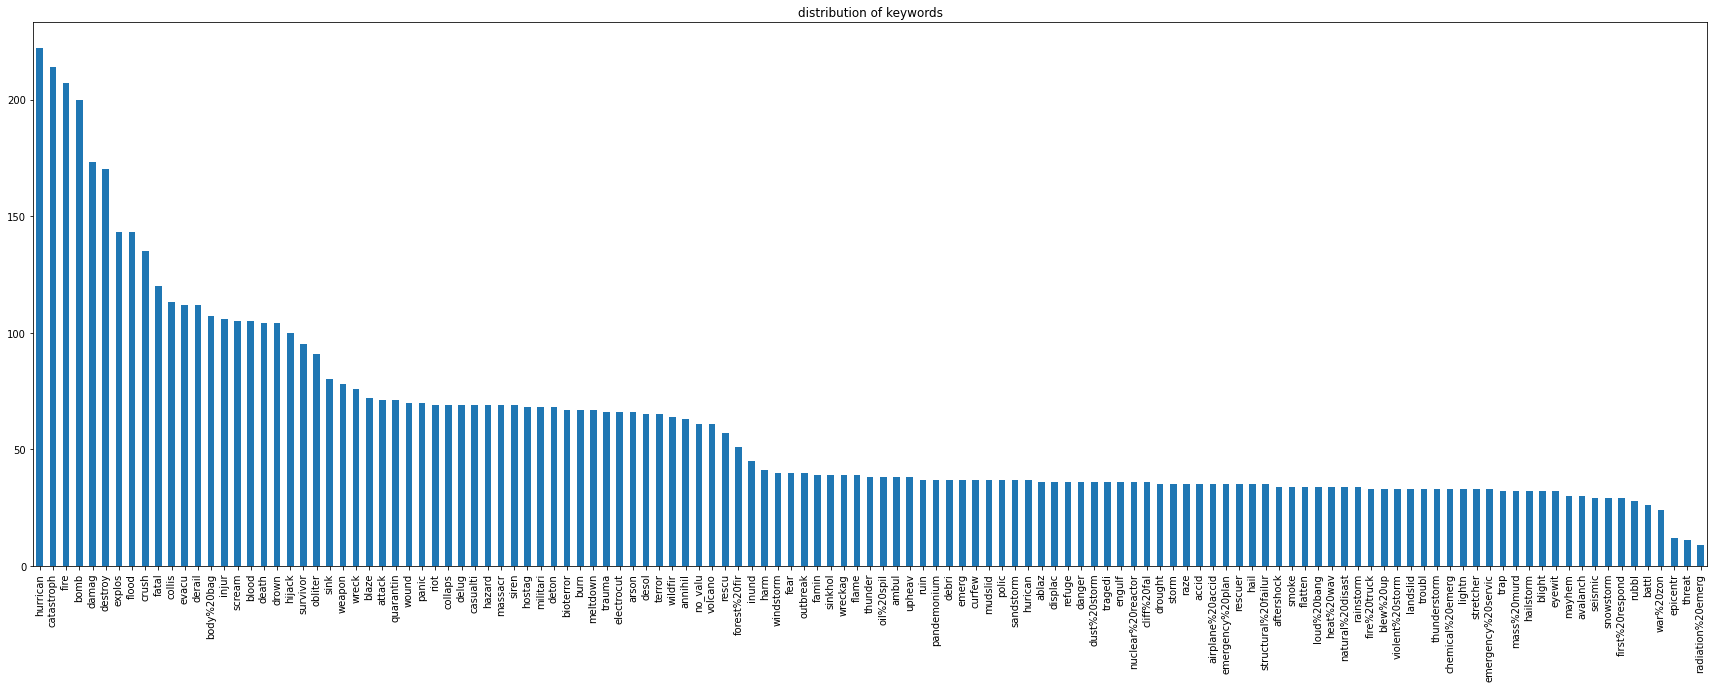

In [9]:
plt.figure(figsize=(30,10))
df['keywords_final'].value_counts().plot(kind='bar')

plt.title("distribution of keywords")
plt.show()

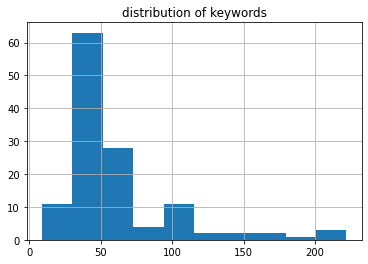

In [10]:
df['keywords_final'].value_counts().hist()
plt.title("distribution of keywords")
plt.show()

In [11]:
df.location.unique()

array(['no_value', 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [12]:
df.location.nunique()

3342

In [13]:
df['location'].value_counts()

no_value                 2533
USA                       104
New York                   71
United States              50
London                     45
                         ... 
The Sun's Corona            1
Starling City               1
CT, USA                     1
Elkhart, IN                 1
california mermaid ?        1
Name: location, Length: 3342, dtype: int64

In [14]:
# no action for location until requested


### clean text

In [15]:
# text cleaning

df.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [16]:
# erase punctuation

def clean_text(text):
  # get rid of all unwanted punctuation and digits
  text = text.replace("´", "'")

  digi_punct = "[^a-zA-Z' ]"
  text = re.sub(digi_punct, " ", text)

  text = " ".join(text.split())

  text = text.lower()

  return text

In [17]:

df['clean']=df['text'].apply(lambda text: clean_text(text))

In [18]:
'''
# tokenize

tokenizer = nltk.tokenize.WordPunctTokenizer()

df['clean']=df['clean'].apply(lambda text: nltk.word_tokenize(text))
'''

"\n# tokenize\n\ntokenizer = nltk.tokenize.WordPunctTokenizer()\n\ndf['clean']=df['clean'].apply(lambda text: nltk.word_tokenize(text))\n"

In [19]:
df['clean']

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to 'shelter in place' are ...
3       people receive wildfires evacuation orders in ...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    aria ahrary thetawniest the out of control wil...
7610    m utc km s of volcano hawaii http t co zdtoyd ebj
7611    police investigating after an e bike collided ...
7612    the latest more homes razed by northern califo...
Name: clean, Length: 7613, dtype: object

In [20]:
# stemmer & stopwords

my_stopwords = stopwords.words('english')

df["clean"] = df["clean"].apply(
    lambda text: " ".join([stemmer.stem(word) for word in text.split() if word not in my_stopwords]))

In [21]:
from sklearn.model_selection import train_test_split
X = df['clean']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(6090,) (6090,) (1523,) (1523,)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(X_train)

In [23]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf = make_pipeline(TfidfVectorizer(),LogisticRegression())
cross_val_score(pipe_tfidf, X_train, y_train).mean()

0.78752052545156

In [25]:
pipe_count = make_pipeline(CountVectorizer(),LogisticRegression())
cross_val_score(pipe_count, X_train, y_train).mean()

0.7898193760262726

Text(0.5, 1.0, 'pred for countV & LogReg')

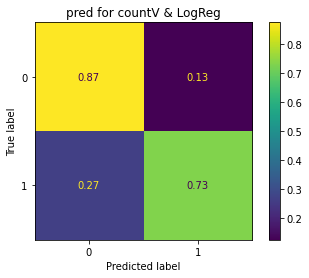

In [26]:
from sklearn.metrics import plot_confusion_matrix

pipe_count.fit(X_train, y_train)
plot_confusion_matrix(pipe_count,X_test,y_test, normalize='true')
plt.title('pred for countV & LogReg')


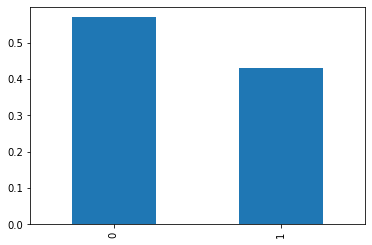

In [27]:
# distribution of y

df.target.value_counts(normalize=True).plot(kind='bar')


### new approach: Day2

-> Markus

In [28]:
df.head()

keyword  ...                                              clean
0  no_value  ...          deed reason earthquak may allah forgiv us
1  no_value  ...               forest fire near la rong sask canada
2  no_value  ...  resid ask 'shelter place' notifi offic evacu s...
3  no_value  ...        peopl receiv wildfir evacu order california
4  no_value  ...  got sent photo rubi alaska smoke wildfir pour ...

[5 rows x 7 columns]

### Verbesserung von KLassifikation durch Vektorisierung von Textblöcken

In [29]:
from sklearn.model_selection import train_test_split
X = df['clean']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

normal: ngram = 1; analyzer='word'

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vectorizer_0 = TfidfVectorizer(ngram_range=(1,1))
tfidf_matrix_0 = tfidf_vectorizer_0.fit_transform(X_train)
print(tfidf_vectorizer_0.get_feature_names(), tfidf_matrix_0[0])

['aa', 'aaaa', 'aaaaaaallll', 'aaarrrgghhh', 'aac', 'aag', 'aal', 'aamir', 'aan', 'aannnnd', 'aar', 'aaronthefm', 'aatt', 'aauizggc', 'ab', 'aba', 'abandon', 'abandonedp', 'abbandon', 'abbott', 'abbruchsimul', 'abbswinston', 'abbyairshow', 'abc', 'abcnew', 'abcnorio', 'abe', 'aberdeen', 'abgct', 'abha', 'abia', 'abil', 'abject', 'abl', 'ablaz', 'ableg', 'ablz', 'abninfvet', 'abnzqwlig', 'abomb', 'abomin', 'abort', 'about', 'abq', 'abran', 'absenc', 'absolut', 'abstorm', 'abstract', 'absurd', 'absurdli', 'abu', 'abus', 'abyhrgss', 'abysmaljoin', 'ac', 'acaciapenn', 'academia', 'acb', 'acc', 'accept', 'access', 'accf', 'accid', 'accident', 'accidents', 'accionempresa', 'accompani', 'accord', 'accordingli', 'account', 'accus', 'accustom', 'acd', 'acdelco', 'acdf', 'ace', 'acebab', 'acebreakingnew', 'acess', 'acfi', 'ach', 'achedin', 'achiev', 'achimota', 'acid', 'ackrrji', 'acmilan', 'acmrm', 'acn', 'acoust', 'acquir', 'acquisit', 'acr', 'acrgdqhj', 'acronym', 'across', 'acrrw', 'acryl', 

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf_0 = make_pipeline(tfidf_vectorizer_0,LogisticRegression())
cross_val_score(pipe_tfidf_0, X_train, y_train).mean()

0.7914614121510674

ngram = 1 (normal); analyzer='char'

In [32]:
tfidf_vectorizer_1 = TfidfVectorizer(analyzer='char',ngram_range=(1,1))
tfidf_matrix_1 = tfidf_vectorizer_1.fit_transform(X_train)
print(tfidf_vectorizer_1.get_feature_names(), tfidf_matrix_1[0])

[' ', "'", 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']   (0, 23)	0.058414812269476896
  (0, 7)	0.05389845747794621
  (0, 17)	0.1284421566136268
  (0, 11)	0.08070149196125964
  (0, 3)	0.10247235557786374
  (0, 14)	0.22053495894666728
  (0, 5)	0.08472048503550547
  (0, 10)	0.22671517842837194
  (0, 26)	0.12280242135285266
  (0, 13)	0.07899203202630782
  (0, 21)	0.30139411209158273
  (0, 20)	0.2802367584021325
  (0, 6)	0.2607474009296117
  (0, 15)	0.19518363140492992
  (0, 9)	0.20212893704330281
  (0, 0)	0.5082225222097202
  (0, 8)	0.09832474695951657
  (0, 2)	0.2982418594704718
  (0, 19)	0.265808409741885
  (0, 22)	0.1748979108838676
  (0, 16)	0.2251559926617687
  (0, 4)	0.08050506712575115


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_tfidf_1 = make_pipeline(tfidf_vectorizer_1,LogisticRegression())
cross_val_score(pipe_tfidf_1, X_train, y_train).mean()

0.635303776683087

ngram=2

In [34]:
tfidf_vectorizer_2 = TfidfVectorizer(analyzer='word',ngram_range=(2,2))
tfidf_matrix_2 = tfidf_vectorizer_2.fit_transform(X_train)
print(tfidf_vectorizer_2.get_feature_names(), tfidf_matrix_2[0])

['aa ayyo', 'aa batteri', 'aa mgm', 'aa nwlha', 'aaaa ok', 'aaaaaaallll even', 'aaarrrgghhh http', 'aac org', 'aag lp', 'aamir javaid', 'aan den', 'aannnnd reddit', 'aar ambul', 'aaronthefm guy', 'aatt amnmd', 'aauizggc battlefield', 'ab http', 'ab resin', 'ab viru', 'aba http', 'aba woman', 'abandon aircraft', 'abandon lrt', 'abandon plan', 'abandon ship', 'abandon west', 'abandonedp delet', 'abbandon sink', 'abbott amp', 'abbott lnp', 'abbott must', 'abbswinston zionist', 'abbyairshow offici', 'abc chicago', 'abc eyewit', 'abc helicopt', 'abc http', 'abc news', 'abc onlin', 'abc onlinea', 'abc onlinemh', 'abc trauma', 'abcnew nuclear', 'abcnew obama', 'abcnew peterdutton', 'abcnew uk', 'abcnorio garden', 'abe govern', 'abe pledg', 'aberdeen tomorrow', 'abgct vfua', 'abha fatal', 'abia inec', 'abil annihil', 'abil massacr', 'abil offer', 'abil stand', 'abject desol', 'abl evacu', 'abl get', 'abl go', 'abl send', 'abl support', 'abl surviv', 'abl touch', 'ablaz aba', 'ablaz amp', 'abla

In [35]:
pipe_tfidf_2 = make_pipeline(tfidf_vectorizer_2,LogisticRegression())
cross_val_score(pipe_tfidf_2, X_train, y_train).mean()

0.6963875205254515

Tfidf Vektorization ngram_range 5 

In [36]:
tfidf_vectorizer_5 = TfidfVectorizer(analyzer='word', ngram_range=(5,5))
tfidf_matrix_5 = tfidf_vectorizer_5.fit_transform(X_train)
print(tfidf_vectorizer_5.get_feature_names(), tfidf_matrix_5[0])

['aa ayyo dei plan visit', 'aa batteri swear old version', 'aa mgm grand http co', 'aaaa ok lemm move anoth', 'aac org surpris still cannot', 'aamir javaid see inund atm', 'aan den rijn collaps build', 'aannnnd reddit quarantin offens content', 'aar ambul decid chill via', 'aaronthefm guy scare show real', 'aauizggc battlefield hardlin new weapon', 'ab http co xpw tje', 'ab resin flower whirlwind flatback', 'aba woman deliv babi without', 'abandon aircraft evacu ultimatum http', 'abandon aircraft mma faan note', 'abandon aircraft mma http co', 'abandon lrt station tuesday hailstorm', 'abandon plan construct uk first', 'abandon west philippin sea http', 'abandonedp delet one abbandon sink', 'abbandon sink darsena castello scaligero', 'abbott amp campbel loud came', 'abbott lnp dupe press overdr', 'abbott must go lnp boat', 'abbswinston zionist terrorist demolish palestinian', 'abbswinston zionist terrorist demolish tire', 'abbswinston zionist terrorist kidnap palestinian', 'abbyairshow 

In [37]:
pipe_tfidf_5 = make_pipeline(tfidf_vectorizer_5,LogisticRegression())
cross_val_score(pipe_tfidf_5, X_train, y_train).mean()

0.6551724137931034

CountVectorizer

Distributed Representations

Feature Union: 

In [38]:
'''
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression

model = make_pipeline([
    
    ('text_union', FeatureUnion(
        transformer_list = [
            ('entity_feature', make_pipeline([
                ('entity_extractor', EntityExtractor()),
                ('entity_vect', CountVectorizer()),
            ])),
            ('keyphrase_feature', make_pipeline([
                ('keyphrase_extractor', KeyphraseExtractor()),
                ('keyphrase_vect', TfidfVectorizer()),
            ])),
        ],
        transformer_weights= {
            'entity_feature': 0.6,
            'keyphrase_feature': 0.2,
        }
    )),
    ('clf', LogisticRegression()),
])
'''

"\nfrom sklearn.pipeline import FeatureUnion\nfrom sklearn.linear_model import LogisticRegression\n\nmodel = make_pipeline([\n    \n    ('text_union', FeatureUnion(\n        transformer_list = [\n            ('entity_feature', make_pipeline([\n                ('entity_extractor', EntityExtractor()),\n                ('entity_vect', CountVectorizer()),\n            ])),\n            ('keyphrase_feature', make_pipeline([\n                ('keyphrase_extractor', KeyphraseExtractor()),\n                ('keyphrase_vect', TfidfVectorizer()),\n            ])),\n        ],\n        transformer_weights= {\n            'entity_feature': 0.6,\n            'keyphrase_feature': 0.2,\n        }\n    )),\n    ('clf', LogisticRegression()),\n])\n"

### NLP

POS

In [39]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [40]:
import spacy
nlp=spacy.load('en_core_web_sm')



In [41]:
df['clean'].apply( lambda satz: nlp(satz) )

0       (deed, reason, earthquak, may, allah, forgiv, us)
1            (forest, fire, near, la, rong, sask, canada)
2       (resid, ask, ', shelter, place, ', notifi, off...
3       (peopl, receiv, wildfir, evacu, order, califor...
4       (got, sent, photo, rubi, alaska, smoke, wildfi...
                              ...                        
7608    (two, giant, crane, hold, bridg, collaps, near...
7609    (aria, ahrari, thetawniest, control, wild, fir...
7610    (utc, km, volcano, hawaii, http, co, zdtoyd, ebj)
7611    (polic, investig, e, bike, collid, car, littl,...
7612    (latest, home, raze, northern, california, wil...
Name: clean, Length: 7613, dtype: object

In [42]:
doc=df['clean'].apply( lambda satz: nlp(satz) )
  

In [43]:
doc

0       (deed, reason, earthquak, may, allah, forgiv, us)
1            (forest, fire, near, la, rong, sask, canada)
2       (resid, ask, ', shelter, place, ', notifi, off...
3       (peopl, receiv, wildfir, evacu, order, califor...
4       (got, sent, photo, rubi, alaska, smoke, wildfi...
                              ...                        
7608    (two, giant, crane, hold, bridg, collaps, near...
7609    (aria, ahrari, thetawniest, control, wild, fir...
7610    (utc, km, volcano, hawaii, http, co, zdtoyd, ebj)
7611    (polic, investig, e, bike, collid, car, littl,...
7612    (latest, home, raze, northern, california, wil...
Name: clean, Length: 7613, dtype: object

In [44]:
doc.apply(lambda wort: wort.ents)

0                                                      ()
1                             ((la, rong, sask, canada),)
2                                                      ()
3                                         ((california),)
4                                             ((alaska),)
                              ...                        
7608                                             ((two),)
7609                       ((aria, ahrari), (california))
7610                           ((km), (hawaii, http, co))
7611                                                   ()
7612    ((latest, home), (northern, california), (abc,...
Name: clean, Length: 7613, dtype: object

In [45]:
# doc.tag_ funktioniert nicht

#for nc in doc:
    #print(nc) 
#print([(token.text, token.tag_, token.pos_) for token in doc])

In [46]:
#doc.apply(lambda wort: wort.tag_)

In [47]:
from spacy import displacy

displacy.render(doc, style="ent", jupyter=True)

/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is su

Sentiment Analysis by Classification

In [55]:
# pipeline
nlp.add_pipe(nlp.create_pipe("textcat"))
nlp.pipe_names

['tagger', 'parser', 'ner', 'textcat']

In [56]:
# discretizing 1 = True (Positive), 0 = False (Negative)
sent_df=pd.DataFrame()
target_df = df["target"] > 0

In [57]:
target_df.unique()

array([ True, False])

In [58]:
# labels 
textcat = nlp.get_pipe("textcat")
print(textcat.add_label("POSITIVE"))
print(textcat.add_label("NEGATIVE"))

1
1


In [59]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(target_df, test_size=0.1, random_state=42)
print(len(train))
print(len(test))

6851
762


In [61]:
# falsch: nur positive ergebnisse
n_samples = 2000 # keeping it small here, because training can take a long time
train_sample = train.sample(n_samples).copy()
train_sample.value_counts()

False    1167
True      833
Name: target, dtype: int64

In [62]:
needed_train_data = [
                     ("THIS IS WHERE THE TWEET TEXT GOES", {"cats": {"POSITIVE": True, "NEGATIVE": False}})
]

In [67]:
# first, compile the innermost dictionary, assigning True/False to each possible label
train_cats = [{"POSITIVE": v, "NEGATIVE": not v} for v in train_sample]

train_cats[:10]

[{'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': False, 'POSITIVE': True},
 {'NEGATIVE': False, 'POSITIVE': True},
 {'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': False, 'POSITIVE': True},
 {'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': True, 'POSITIVE': False},
 {'NEGATIVE': True, 'POSITIVE': False}]

In [69]:
# zip together training texts and their label dictionaries, wrapping the latter in the required outer dictionary
training_data = list(zip(train_sample, [{"cats": cats} for cats in train_cats]))
training_data[:10] # confirm that the format is the same as in the example above

[(False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (True, {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 (True, {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (True, {'cats': {'NEGATIVE': False, 'POSITIVE': True}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}}),
 (False, {'cats': {'NEGATIVE': True, 'POSITIVE': False}})]

In [71]:
from spacy.util import minibatch, compounding
import random

n_iter = 5 # epochs

batch_sizes = compounding(4, 32, 1.001)

with nlp.disable_pipes("tagger", "parser", "ner"): # disable other elements on the piopeline for efficiency
  optimizer = nlp.begin_training()# initialize training

  print("Start training ... ")
  for i in range(n_iter): # loop n_iter number of times over the entire training data
    print(f"Training iteration {i} ... ", end="")
    # do training
    random.shuffle(training_data)

    batches = minibatch(training_data, size=batch_sizes)

    for batch in batches: # train the model in small but increasing batches of the training data
      texts, annotations = zip(*batch)
      nlp.update(texts, annotations, sgd=optimizer, drop=0.2) # update the model with all texts/labels of a batch at once
    print("done.")

Start training ... 
Training iteration 0 ... 

TypeError: ignored

In [72]:
test_sample["Prediction"] = pred
test_sample["Unsure"] = unsure
test_sample.head()

NameError: ignored

### Länder Prediction

In [78]:
# cleaning
df_location_u =pd.DataFrame(data=df.location.unique(),  columns=["location"])
df_location_u

location
0                          no_value
1                        Birmingham
2     Est. September 2012 - Bristol
3                            AFRICA
4                  Philadelphia, PA
...                             ...
3337                             TN
3338         #NewcastleuponTyne #UK
3339              Vancouver, Canada
3340                        London 
3341                        Lincoln

[3342 rows x 1 columns]

In [120]:
df['location_clean']=df['location'].str.lower()

In [121]:
einheits_dict = {
    'no_value':'',
    'est. september 2012 - bristol': 'bristol',
    'vancouver, vanada':'vancouver',
    '#newcastleupontyne #uk':'newcastle',
    'philadelphia, pa':'philadelphia',

}

pd.set_option('display.max_rows', len(df['location_clean']))
print(df['location_clean'])
df['location_clean']=df['location'].replace(einheits_dict)

print("Unterschiedliche Locations nach manuellem einsortieren: ",df.location_clean.nunique())
print(df.location_clean.unique())

0                                                no_value
1                                                no_value
2                                                no_value
3                                                no_value
4                                                no_value
5                                                no_value
6                                                no_value
7                                                no_value
8                                                no_value
9                                                no_value
10                                               no_value
11                                               no_value
12                                               no_value
13                                               no_value
14                                               no_value
15                                               no_value
16                                               no_value
17            

In [122]:
# only letters
df['location_clean']=df['location_clean'].apply(lambda text: clean_text(text))
df['location_clean']

0                                                  
1                                                  
2                                                  
3                                                  
4                                                  
5                                                  
6                                                  
7                                                  
8                                                  
9                                                  
10                                                 
11                                                 
12                                                 
13                                                 
14                                                 
15                                                 
16                                                 
17                                                 
18                                                 
19          

In [ ]:
# REGEX: if one letter 3 times - it has to go
import re

# 'san antoniooooo'
# m k a d

In [170]:
# stopwords raaus

my_stopwords = stopwords.words('english')+['san antoniooooo','click the link below okay', "' ",'at your back','no id no vote','itunes','worldwide','primum non nocere', "' n ' e ", ]

df['location_clean'] = df['location_clean'].apply(
    lambda text: " ".join([word for word in text.split() if word not in my_stopwords]))

In [131]:
df['location_clean'][50:60]

50    sheffield township ohio
51                      india
52                    barbado
53                    anaheim
54                      abuja
55                        usa
56               south africa
57           sao paulo brazil
58              hollywoodland
59    edmonton alberta treati
Name: location_clean, dtype: object

In [ ]:
'''
nicht alles ist echte location.
idee: mit pos/ner herausfinden, welche wörter Orte sind und den rest rausschmeißen

scituate ma
2674                                      hkxfymhex
2675                             hamilton county in
2676                                          dakar
2677                                   in your head
2678                     the sanctuary network rome
2679                       tractor land aka bristol
2680                          adventuring in narnia
2681                                         asgard
2682                            unite bless wallahi
2683                   sneaking glances at thancred
2684                                            ljp
2685                       charlotte north carolina
2686                                        nirvana
2687                                             ny
2688                                      mentor oh
2689                               trumann arkansas
2690                                             cc
2691                                       d sos ag
2692                                         pa usa
2693                                        m k a d
2694                              pissing off antis
2695                              'san antoniooooo'
'''

In [ ]:
# POS/NER

doc_loc =df_location_u['location_final'].apply( lambda satz: nlp(satz) )
doc_loc

In [ ]:
doc_loc_ents =doc_loc.apply(lambda wort: wort.ents)
doc_loc_ents

In [ ]:
displacy.render(doc_loc, style="ent", jupyter=True)

In [118]:
'''
from sklearn.model_selection import train_test_split
X={}
for i in range(len(doc_loc)):
 X[i]= doc_loc[i]
 i+=1
X= pd.Series(X)
y = df['target']
print(X.shape, y.shape)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
#print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
'''

(3342,) (7613,)


In [ ]:
''' 
POS mit pred funktioniert nicht wg ungleicher anzahl an Zeilen
'''

In [132]:
from sklearn.model_selection import train_test_split

X = df['location_clean']
y= df.target

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=42)
print(len(X_train))
print(len(X_test))

6851
762


In [138]:
# Vectorizer + Score
tfidf_vectorizer_loc = TfidfVectorizer(analyzer='word', ngram_range=(1,1))
tfidf_matrix_loc = tfidf_vectorizer_loc.fit_transform(X_train)
print(tfidf_vectorizer_loc.get_feature_names(), tfidf_matrix_loc[0])

pipe_tfidf_loc = make_pipeline(tfidf_vectorizer_loc,LogisticRegression())
cross_val_score(pipe_tfidf_loc, X_train, y_train).mean()

['aan', 'aarhu', 'ab', 'aberdeenshir', 'absecon', 'abudhabi', 'abuja', 'academi', 'accept', 'access', 'account', 'accra', 'across', 'act', 'action', 'ad', 'adelaid', 'adventist', 'adventur', 'aep', 'aest', 'af', 'afghanistan', 'africa', 'african', 'ag', 'agb', 'age', 'aggress', 'ahead', 'air', 'airdri', 'airport', 'aisl', 'aix', 'ak', 'aka', 'akron', 'akur', 'akwa', 'al', 'alabama', 'alam', 'alameda', 'alaska', 'albani', 'alberta', 'albuquerqu', 'alegr', 'alex', 'alexandria', 'alger', 'alicant', 'alley', 'alliston', 'allov', 'alma', 'alphen', 'also', 'alto', 'alton', 'alumnu', 'alvarez', 'alvin', 'alway', 'amarillo', 'amazon', 'amc', 'ame', 'america', 'american', 'amman', 'amsterdam', 'an', 'anaheim', 'anchorag', 'anderson', 'angel', 'angl', 'anim', 'ankara', 'annapoli', 'anne', 'anonym', 'antarctica', 'anti', 'antigua', 'antioch', 'antoin', 'antonio', 'antoniooooo', 'anybodi', 'anyweher', 'anywher', 'anzio', 'ape', 'apertur', 'app', 'aprylpooley', 'aqu', 'ar', 'arab', 'arabia', 'araca

0.5850234524322915

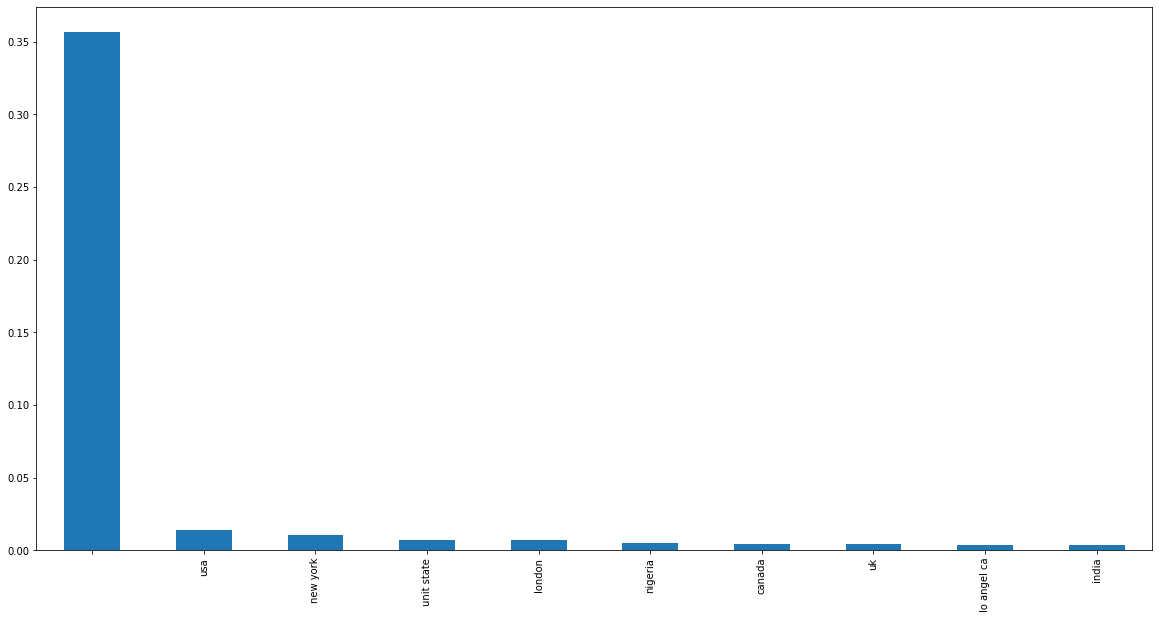

In [146]:
# Verteilung
plt.figure(figsize=(20,10))
df['location_clean'].value_counts(normalize=True).nlargest(10).plot(kind='bar')

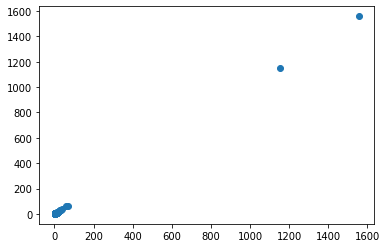

In [180]:
import matplotlib.pyplot as plt

plt.scatter(df.groupby('location_clean')['target'].value_counts(), df.groupby('location_clean')['target'].value_counts())